In [ ]:
#Loading the csv into colab
from google.colab import files
files.upload()

Saving ANL317 Data.csv to ANL317 Data.csv


{'ANL317 Data.csv': b'DATE,INCIDENTS\r\n9/1/2021,67800\r\n9/2/2021,67991\r\n9/3/2021,68210\r\n9/4/2021,68469\r\n9/5/2021,68660\r\n9/6/2021,68901\r\n9/7/2021,69233\r\n9/8/2021,69582\r\n9/9/2021,70039\r\n9/10/2021,70612\r\n9/11/2021,71167\r\n9/12/2021,71687\r\n9/13/2021,72294\r\n9/14/2021,73131\r\n9/15/2021,73938\r\n9/16/2021,74848\r\n9/17/2021,75783\r\n9/18/2021,76792\r\n9/19/2021,77804\r\n9/20/2021,78721\r\n9/21/2021,79899\r\n9/22/2021,81356\r\n9/23/2021,82860\r\n9/24/2021,84510\r\n9/25/2021,85953\r\n9/26/2021,87892\r\n9/27/2021,89539\r\n9/28/2021,91775\r\n9/29/2021,94043\r\n9/30/2021,96521\r\n'}

In [ ]:
#Importing necessary libraries
import pandas as pd
from matplotlib import pyplot
import seaborn as sns
import numpy as np


In [ ]:
#Loading the data from csv file to a df

dataS = pd.read_csv("ANL317 Data.csv", index_col = "DATE", header =0, sep=",")
dataS.head()


,INCIDENTS
DATE,
9/1/2021,67800
9/2/2021,67991
9/3/2021,68210
9/4/2021,68469
9/5/2021,68660


In [ ]:
#Info
dataS.info()

<class 'pandas.core.frame.DataFrame'>
Index: 30 entries, 9/1/2021 to 9/30/2021
Data columns (total 1 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   INCIDENTS  30 non-null     int64
dtypes: int64(1)
memory usage: 480.0+ bytes


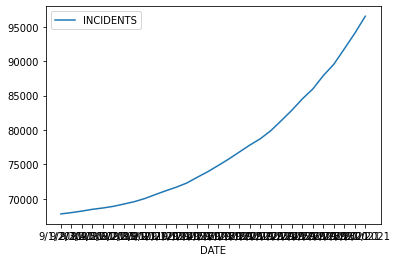

In [ ]:
#Plotting data to visualize seasonality
sns.lineplot(data=dataS)


In [ ]:
#Differencing across the dataset
d_diff = dataS.diff(periods=1, axis=0)

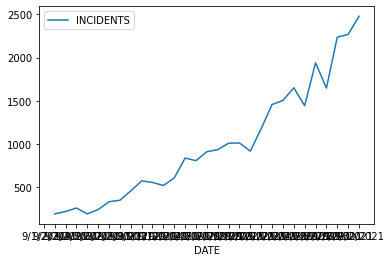

In [ ]:
#Visualizing the differenced dataset
sns.lineplot(data=d_diff)

In [ ]:
#Adding the 3-period Moving Average
dataS['MA3'] = dataS.rolling(window=3).mean()

In [ ]:
#Adding the 5 period Moving Average
dataS['MA5'] = dataS.rolling(window=5)['INCIDENTS'].mean()


In [ ]:
#Adding the 7 period Moving Average
dataS['MA7'] = dataS.rolling(window=7)['INCIDENTS'].mean()

In [ ]:
#Displaying the table
MAs = dataS.drop(['INCIDENTS'], axis=1)
MAs.head()

,MA3,MA5,MA7
DATE,,,
9/1/2021,NaN,NaN,NaN
9/2/2021,NaN,NaN,NaN
9/3/2021,68000.333333,NaN,NaN
9/4/2021,68223.333333,NaN,NaN
9/5/2021,68446.333333,68226.0,NaN


In [ ]:
#Displaying the whole MA table
MAs.info

<bound method DataFrame.info of                     MA3      MA5           MA7
DATE                                          
9/1/2021            NaN      NaN           NaN
9/2/2021            NaN      NaN           NaN
9/3/2021   68000.333333      NaN           NaN
9/4/2021   68223.333333      NaN           NaN
9/5/2021   68446.333333  68226.0           NaN
9/6/2021   68676.666667  68446.2           NaN
9/7/2021   68931.333333  68694.6  68466.285714
9/8/2021   69238.666667  68969.0  68720.857143
9/9/2021   69618.000000  69283.0  69013.428571
9/10/2021  70077.666667  69673.4  69356.571429
9/11/2021  70606.000000  70126.6  69742.000000
9/12/2021  71155.333333  70617.4  70174.428571
9/13/2021  71716.000000  71159.8  70659.142857
9/14/2021  72370.666667  71778.2  71216.000000
9/15/2021  73121.000000  72443.4  71838.285714
9/16/2021  73972.333333  73179.6  72525.285714
9/17/2021  74856.333333  73998.8  73264.000000
9/18/2021  75807.666667  74898.4  74067.571429
9/19/2021  76793.000000  758

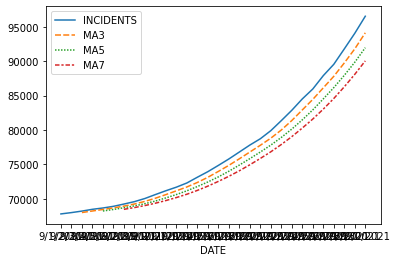

In [ ]:
#Visualizing Data with New MAs
sns.lineplot(data=dataS)

In [ ]:

del dataS['MA5']
del dataS['MA7']

DOUBLE EXPONENTIAL SMOOTHING MODEL;

In [ ]:
#Getting necessary Libraries
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
#Creating class
model = ExponentialSmoothing(dataS, trend='add',
                             damped=False, seasonal=None,
                             seasonal_periods = 1)
#Fitting the Model


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


In [ ]:
#Fitting the model
model_fit = model.fit()
print(model_fit)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:712: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning)


In [ ]:
#Making Predictions
yhat = model_fit.forecast(30)
print(yhat)

2021-10-01     98953.537638
2021-10-02    101409.037326
2021-10-03    103864.537014
2021-10-04    106320.036702
2021-10-05    108775.536390
2021-10-06    111231.036078
2021-10-07    113686.535766
2021-10-08    116142.035454
2021-10-09    118597.535142
2021-10-10    121053.034831
2021-10-11    123508.534519
2021-10-12    125964.034207
2021-10-13    128419.533895
2021-10-14    130875.033583
2021-10-15    133330.533271
2021-10-16    135786.032959
2021-10-17    138241.532647
2021-10-18    140697.032335
2021-10-19    143152.532023
2021-10-20    145608.031711
2021-10-21    148063.531399
2021-10-22    150519.031087
2021-10-23    152974.530775
2021-10-24    155430.030463
2021-10-25    157885.530151
2021-10-26    160341.029839
2021-10-27    162796.529527
2021-10-28    165252.029215
2021-10-29    167707.528903
2021-10-30    170163.028592
Freq: D, dtype: float64


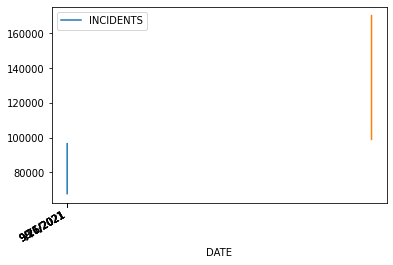

In [ ]:
#Plotting the new data with the old data
ax = dataS.plot( figsize = (6,4), legend = True)

yhat.plot(ax = ax)